# Machine Learning Linear Regression Model 2 
> ## Maternal Mortality Analysis without Race
***

### Importing Dependencies

In [2]:
# Importing dependencies:
import numpy as np
import pandas as pd

### Read the CSV and Perform Basic Data Cleaning

In [3]:
# Reading the csv file into a pandas DataFrame
mmr_without_race = pd.read_csv('../Resources/non_race_data.csv')
mmr_without_race

,year,state,id,state_code,latitude,longitude,deaths,births,maternal_mortality_ratio,population,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
0,2015,Alabama,US.AL,AL,32.318231,-86.902298,12.0,59657.0,20.11,2505795.0,...,10095.0,21.1,12.9,-0.371,-0.325,611.0,1.2,34.3,103.5,10.0
1,2016,Alabama,US.AL,AL,32.318231,-86.902298,35.0,59151.0,59.17,2507714.0,...,10097.0,21.4,11.1,-0.427,-0.366,600.2,1.1,32.0,116.4,10.1
2,2017,Alabama,US.AL,AL,32.318231,-86.902298,41.0,58941.0,69.56,2514911.0,...,10321.0,21.5,9.6,-0.427,-0.335,543.6,1.2,30.1,119.3,10.4
3,2018,Alabama,US.AL,AL,32.318231,-86.902298,31.0,57761.0,53.67,2523756.0,...,10720.0,20.9,9.3,-0.483,-0.356,553.6,1.1,28.4,122.8,10.3
4,2019,Alabama,US.AL,AL,32.318231,-86.902298,35.0,58615.0,59.71,2533668.0,...,10435.0,19.2,9.7,-0.437,-0.383,614.1,1.2,27.0,122.8,10.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,2014,Wisconsin,US.WI,WI,43.784440,-88.787868,16.0,67161.0,23.82,2898057.0,...,6207.0,18.7,9.0,0.165,0.067,415.4,2.0,21.9,125.0,7.1
304,2015,Wisconsin,US.WI,WI,43.784440,-88.787868,11.0,67041.0,16.41,2903737.0,...,6365.0,17.4,8.2,0.146,0.046,411.6,1.9,19.6,125.3,7.0
305,2016,Wisconsin,US.WI,WI,43.784440,-88.787868,15.0,66615.0,22.52,2905282.0,...,6324.0,17.3,6.5,0.114,0.106,403.2,1.9,18.0,140.3,7.3
306,2017,Wisconsin,US.WI,WI,43.784440,-88.787868,12.0,64975.0,18.47,2912745.0,...,6437.0,17.1,5.5,0.201,0.072,423.5,1.9,16.2,145.2,7.3


In [4]:
# Checking dataframe rows
mmr_without_race.count()

year                        308
state                       308
id                          308
state_code                  308
latitude                    308
longitude                   308
deaths                      308
births                      308
maternal_mortality_ratio    308
population                  308
employer                    308
non_group                   308
medicaid                    308
medicare                    308
military                    308
uninsured                   308
air_pollution_val           308
cancer_death_val            308
cardio_death_val            308
child_pov_val               308
choles_check_val            308
dent_vis_val                308
dentists_val                308
diabetes_val                308
drug_deaths_val             308
health_stat_fem_val         308
immun_child_val             308
income_ineq_val             308
infant_mort_val             308
infect_dis_val              308
obesity_val                 308
phys_ina

In [5]:
# Checking data types and columns
mmr_without_race.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      308 non-null    int64  
 1   state                     308 non-null    object 
 2   id                        308 non-null    object 
 3   state_code                308 non-null    object 
 4   latitude                  308 non-null    float64
 5   longitude                 308 non-null    float64
 6   deaths                    308 non-null    float64
 7   births                    308 non-null    float64
 8   maternal_mortality_ratio  308 non-null    float64
 9   population                308 non-null    float64
 10  employer                  308 non-null    float64
 11  non_group                 308 non-null    float64
 12  medicaid                  308 non-null    float64
 13  medicare                  308 non-null    float64
 14  military  

In [6]:
mmr_without_race.columns

Index(['year', 'state', 'id', 'state_code', 'latitude', 'longitude', 'deaths',
       'births', 'maternal_mortality_ratio', 'population', 'employer',
       'non_group', 'medicaid', 'medicare', 'military', 'uninsured',
       'air_pollution_val', 'cancer_death_val', 'cardio_death_val',
       'child_pov_val', 'choles_check_val', 'dent_vis_val', 'dentists_val',
       'diabetes_val', 'drug_deaths_val', 'health_stat_fem_val',
       'immun_child_val', 'income_ineq_val', 'infant_mort_val',
       'infect_dis_val', 'obesity_val', 'phys_inac_val', 'prem_death_val',
       'smoking_val', 'uninsured_val', 'all_determs_val', 'all_outcomes_val',
       'chlamydia_val', 'prem_death_ri_val', 'teen_birth_val',
       'primary_care_val', 'low_birthweight_val'],
      dtype='object')

In [7]:
# Printing the correlation matrix with `corr()`
mmr_without_race.corr()

,year,latitude,longitude,deaths,births,maternal_mortality_ratio,population,employer,non_group,medicaid,...,prem_death_val,smoking_val,uninsured_val,all_determs_val,all_outcomes_val,chlamydia_val,prem_death_ri_val,teen_birth_val,primary_care_val,low_birthweight_val
year,1.000000,-0.027653,-0.004793,0.003753,-0.071986,0.193755,-0.023038,0.088274,0.436825,0.432700,...,0.046539,-0.221430,-0.606058,-0.002987,-0.179363,0.378793,-0.125269,-0.656458,0.436571,0.023204
latitude,-0.027653,1.000000,-0.093409,-0.327565,-0.163899,-0.394296,-0.147033,0.718879,-0.155373,0.196342,...,-0.572090,-0.217094,-0.583706,0.653423,0.540649,-0.468779,0.585510,-0.472547,0.460243,-0.612014
longitude,-0.004793,-0.093409,1.000000,-0.035413,-0.208043,0.170854,-0.154017,0.260086,-0.253765,-0.003201,...,0.187744,0.281804,-0.164899,-0.097749,-0.238456,0.133204,-0.263424,-0.124243,0.358423,0.478018
deaths,0.003753,-0.327565,-0.035413,1.000000,0.821868,0.235069,0.789032,-0.268798,0.042867,-0.081354,...,-0.175551,-0.247768,0.395845,-0.085967,0.086018,0.114382,-0.237738,0.048008,-0.050138,0.011313
births,-0.071986,-0.163899,-0.208043,0.821868,1.000000,-0.229183,0.987923,-0.227187,0.094957,0.015316,...,-0.369198,-0.400382,0.311630,0.126885,0.256755,-0.008703,-0.067050,-0.025878,0.026635,-0.210687
maternal_mortality_ratio,0.193755,-0.394296,0.170854,0.235069,-0.229183,1.000000,-0.249864,-0.262488,-0.048984,0.028156,...,0.498445,0.329596,0.122712,-0.496458,-0.488129,0.359987,-0.396286,0.157247,-0.175889,0.472751
population,-0.023038,-0.147033,-0.154017,0.789032,0.987923,-0.249864,1.000000,-0.208207,0.132825,0.069372,...,-0.390039,-0.417872,0.241285,0.159525,0.257701,0.001806,-0.070141,-0.105223,0.094877,-0.211416
employer,0.088274,0.718879,0.260086,-0.268798,-0.227187,-0.262488,-0.208207,1.000000,-0.084822,-0.131332,...,-0.518399,-0.292632,-0.622332,0.627947,0.513107,-0.445105,0.474462,-0.591573,0.515622,-0.411161
non_group,0.436825,-0.155373,-0.253765,0.042867,0.094957,-0.048984,0.132825,-0.084822,1.000000,-0.024795,...,-0.227284,-0.351730,-0.153542,0.144042,0.132474,-0.002229,-0.047133,-0.403596,0.013671,-0.212408
medicaid,0.432700,0.196342,-0.003201,-0.081354,0.015316,0.028156,0.069372,-0.131332,-0.024795,1.000000,...,0.041218,0.014845,-0.533526,0.007717,-0.156394,0.264816,0.019945,-0.312497,0.445830,0.021510


### Ploting Data for Visualization 
***

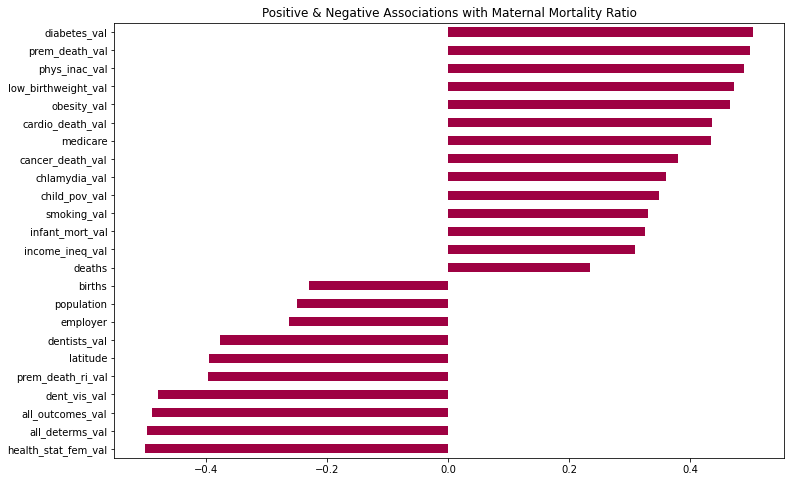

In [13]:
# Importing plotting dependencies
import matplotlib.pyplot as plt
%matplotlib inline

# Using the `corr()` to do initial plotting of the dataframe that have positive and negative association with MMR
y='maternal_mortality_ratio'
corrdf=mmr_without_race.corr()[y].drop(y).sort_values()

# Setting the association to be equal and greated than `>=0.20`
corrdf=corrdf[abs(corrdf)>=0.20]

# Plot 1: barh barplot showing the Positive & Negative Associations with Maternal Mortality Ratio
corrdf.plot(kind='barh',figsize=(12,8),colormap='Spectral')
plt.title("Positive & Negative Associations with Maternal Mortality Ratio")

# Saving plot
plt.savefig("../../Images/MMR_Non_Race_Association.png")

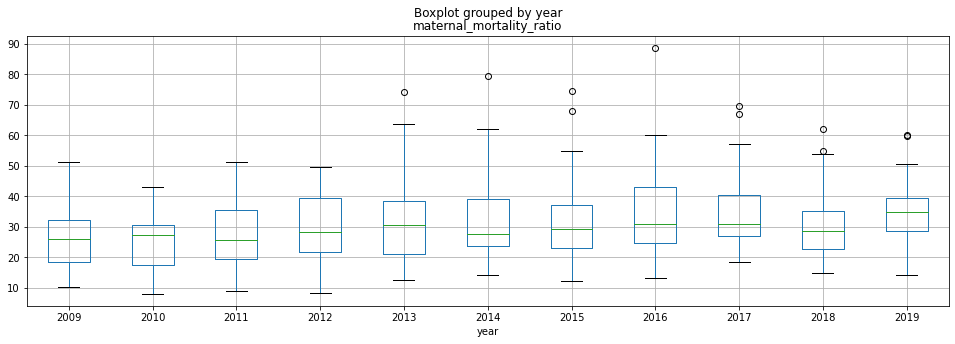

In [16]:
# Plot 2: Boxplot of maternal mortality grouped by year
mmr_without_race.boxplot(by='year', column=['maternal_mortality_ratio'], figsize=(16,5))

# Saving plot
plt.savefig("../../Images/MMR_Boxplot_by_year.png")

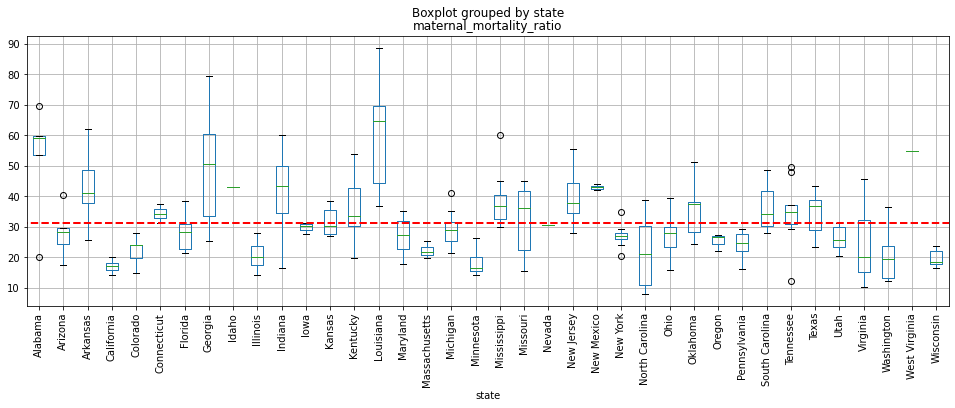

In [18]:
# Plot 3: Boxplot of maternal mortality grouped by state
y = 'maternal_mortality_ratio'

# Grouping boxplot by state
ax = mmr_without_race.boxplot(by='state', column=[y], figsize=(16,5), rot=90)

# Adding horizontal line across the axis
ax.axhline(y=mmr_without_race[y].mean(), xmin=-1, xmax=100, color='r', linestyle='--', lw=2)

# Saving plot
plt.savefig("../../Images/MMR_Boxplot_by_State.png")